/Users/azadeh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 0.9737
Log_loss: 0.9132
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     0.938     0.968        16
           2      0.900     1.000     0.947         9

    accuracy                          0.974        38
   macro avg      0.967     0.979     0.972        38
weighted avg      0.976     0.974     0.974        38



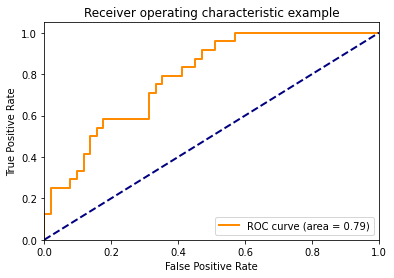

<ipython-input-78-7b777c44868e>:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


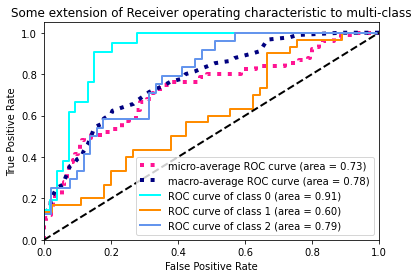

In [78]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# import some data to play with
iris = datasets.load_iris()


x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)


# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(x_train, y_train)

predictions = logreg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Use score method to get accuracy of model
score = logreg.score(x_test, y_test)
print('Accuracy: {0:0.4f}'.format(score))

# #############################################################################


# 2. Precision Score

pred = logreg.predict_proba(x_test)

print('Log_loss: {0:0.4f}'.format(metrics.log_loss(y_test, pred)))

print(metrics.classification_report(y_test, predictions, digits=3))
# #############################################################################


# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# #############################################################################



# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



<h3>Analysis metrics and explain the result:<h3>
###### In this example, it is used 3 classes dataset, and It is classified with Logistic regression. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. (The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris Virginica, Iris Versicolar). Four features were measured from each sample). The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. I use 38 of 150 (almost %25) as testing data.    
    
#### <blockquote>Confusion Matrix</blockquote>
The first out put is confusion matrix. It is 3x3 matrix, because we have 3 classes. The rows show the Predicted class and columns show the Actual class. The perfect case for confusion matrix happens when the total of main diameter cells would be maximum and other cells would be 0. For example in cell[11] we can see the true positive of class 1 or the number of correctly predicted class 1. It means 13 observations are belonged to this class. The total of two other cells in row 1 is 0. It shows the number of predicted observations for class 1 which are really belonged to two others class (False Positive for class1) is 0. We have 13 observations out of 38 which is belonged to class 1 and it is predicted completely true. In class 2, we have 16 observations out of 38 which is belonged to class 2, It is predicted 15 observations true and only 1 observation is predicted wrong. It is predicted for class 3. For class 3, the same as class 1 all observations are predicted correct. It is 9.
    
#### <blockquote>Accuracy</blockquote> 
I calculated some logistic regression metrics for evaluate this model. The accuracy shows describing the number of correct predictions over all predictions which is 0.9736. It means almost 97 correct predictions out of 100 total examples. This tells us that for the 150 observations used in the model, the model correctly predicted whether or not somebody churned 97.47% of the time.
While accuracy alone doesn't tell the full story, there is a significant disparity between the number of positive and negative labels and in this kind of problem also the Accuracy is a good measure because we have quite balanced datasets and are interested in all types of outputs equally, same as here. But often it is useful to also look a bit deeper.
    
#### <blockquote>Log-loss</blockquote>
It is a measure of uncertainty, so a low Log Loss means a low uncertainty/entropy of your model. It useful to compare models not only on their output but regarding probability. It provides only a global measurement of your performance and it be harder to interpret without other metrics.

#### <blockquote>Precision</blockquote> 
Precision is great to focus on when we want to minimize false positives. In a classification problem, A precision score near to 1.0 for each class means that every item labelled as belonging to that class does indeed belong to it. You can obviously see in all 3 classes the Precision is almost 1.0.   

#### <blockquote>Recall</blockquote> 
Recall is very important when we really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.
When recall is near to 1.0 means that every item from each class was labelled as belonging to it. You can obviously see in all 3 classes the Recall is almost 1.0 same as Precision.
In general, we prefer classifiers with higher precision and recall scores. The precision and recall is not necessarily useful alone, and we are interested in the overall picture. Accuracy is always good to check as one option that I have already discuss on it. F1-score is another.
F1-score 
F1-score combines precision and recall that works also for cases where the datasets are imbalanced as it requires both precision and recall having a reasonable value, while here we have a completely balanced data set. The F1-score will always be located between precision and recall. When both Recall and Precision are equal and near to 1.0, the F1-score would be almost maximum, and it is near 1.0, like this modeling.

##### Notice the support column it lists the number of samples for each class.
   
#### <blockquote>ROC Curve</blockquote> 
Another significant metrics for showing the performance of a classification model is the Roc curve. ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. It is used in binary classification to study the output of a classifier. For extending ROC curve and ROC area to multi-label classification, it should be binarize the output.
ROC curves are great metrics when the observations are balanced.
It typically features true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the perfect point which a false positive rate is zero, and a true positive rate is one. It means a larger area under the curve (AUC) is usually better. In this model we can see the Roc curve of class 0 is pretty good. It is almost on the left top area which shows maximum range of true positive and minimum of false negative. The Roc curve of class 1 is not completely appropriate. It is near to random classifier, but the Roc curve of class 2 is better. The pink dash line is micro-averaging. It is also be plotted by considering each element of the label that represents matrix as a binary prediction. The dash blue line is macro averaging, which gives the classification of each label equal weight.
Remember the black dash line shows a random classifier.
The gradient of ROC curves is also important, it is perfect if the true positive rate would be maximized, while false positive rate is minimized.








